In [42]:
import pandas as pd 
import numpy as np
df2=pd.read_csv(r"movies.csv")
df1=pd.read_csv(r"credits.csv")

In [43]:
df1.columns = ['id','tittle','cast','crew']
big_table= df2.merge(df1,on='id')
big_table.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [44]:
columns_to_remove = ["homepage","keywords","original_language", "tagline", "title","overview", "production_countries", "production_companies","release_date","revenue","runtime","spoken_languages","tagline","title"]

movies = big_table.drop(columns=columns_to_remove, axis=1)
movies

,budget,genres,id,original_title,popularity,status,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,Avatar,150.437577,Released,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,Pirates of the Caribbean: At World's End,139.082615,Released,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,Spectre,107.376788,Released,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,The Dark Knight Rises,112.312950,Released,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,John Carter,43.926995,Released,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,El Mariachi,14.269792,Released,6.6,238,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,Newlyweds,0.642552,Released,5.9,5,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"Signed, Sealed, Delivered",1.444476,Released,7.0,6,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,0,[],126186,Shanghai Calling,0.857008,Released,5.7,7,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [45]:
vote_average_threshold = movies['vote_average'].mean()
vote_count_threshold = movies['vote_count'].mean()
popularity_threshold = movies['popularity'].mean()

# Create the "is_popular" column based on the criteria
movies['liked'] = (
    (movies['vote_average'] >= vote_average_threshold) &
    (movies['vote_count'] >= vote_count_threshold) &
    (movies['popularity'] >= popularity_threshold)
).astype(int)

In [46]:
import ast

def convert_genres(text):
    l = []
    for i in ast.literal_eval(text):
        l.append(i['name'])
    return l

In [47]:
movies['genres'] = movies['genres'].apply(convert_genres)

In [48]:
movies.head(2)

,budget,genres,id,original_title,popularity,status,vote_average,vote_count,tittle,cast,crew,liked
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,Released,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",1
1,300000000,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,Released,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",1


In [49]:
def convert_cast(text):
    l = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            l.append(i['name'])
        counter += 1
    return l

In [50]:
movies['cast'] = movies['cast'].apply(convert_cast)
movies.head(2)

,budget,genres,id,original_title,popularity,status,vote_average,vote_count,tittle,cast,crew,liked
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,Released,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",1
1,300000000,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,Released,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",1


In [51]:
def fetch_director(text):
    l = []
    for i in ast.literal_eval(text):
        if i['job'] == "Director":
            l.append(i['name'])
            break
    return l

In [52]:
movies['Director'] = movies['crew'].apply(fetch_director)
movies.drop(['crew','status'],axis="columns",inplace=True)
movies.head(2)

,budget,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,liked,Director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",1,[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",1,[Gore Verbinski]


In [53]:
movies.head(2)

,budget,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,liked,Director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",1,[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",1,[Gore Verbinski]


In [54]:
movies['Director'] = movies['Director'].apply(lambda x: ''.join(x))
movies['genres'] = movies['genres'].apply(lambda x: ''.join(x))
movies['cast'] = movies['cast'].apply(lambda x: ''.join(x))
movies

,budget,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,liked,Director
0,237000000,ActionAdventureFantasyScience Fiction,19995,Avatar,150.437577,7.2,11800,Avatar,Sam WorthingtonZoe SaldanaSigourney Weaver,1,James Cameron
1,300000000,AdventureFantasyAction,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,Pirates of the Caribbean: At World's End,Johnny DeppOrlando BloomKeira Knightley,1,Gore Verbinski
2,245000000,ActionAdventureCrime,206647,Spectre,107.376788,6.3,4466,Spectre,Daniel CraigChristoph WaltzLéa Seydoux,1,Sam Mendes
3,250000000,ActionCrimeDramaThriller,49026,The Dark Knight Rises,112.312950,7.6,9106,The Dark Knight Rises,Christian BaleMichael CaineGary Oldman,1,Christopher Nolan
4,260000000,ActionAdventureScience Fiction,49529,John Carter,43.926995,6.1,2124,John Carter,Taylor KitschLynn CollinsSamantha Morton,1,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,ActionCrimeThriller,9367,El Mariachi,14.269792,6.6,238,El Mariachi,Carlos GallardoJaime de HoyosPeter Marquardt,0,Robert Rodriguez
4799,9000,ComedyRomance,72766,Newlyweds,0.642552,5.9,5,Newlyweds,Edward BurnsKerry BishéMarsha Dietlein,0,Edward Burns
4800,0,ComedyDramaRomanceTV Movie,231617,"Signed, Sealed, Delivered",1.444476,7.0,6,"Signed, Sealed, Delivered",Eric MabiusKristin BoothCrystal Lowe,0,Scott Smith
4801,0,,126186,Shanghai Calling,0.857008,5.7,7,Shanghai Calling,Daniel HenneyEliza CoupeBill Paxton,0,Daniel Hsia


In [55]:
from sklearn.preprocessing import LabelEncoder
le_genres = LabelEncoder()
le_original_title = LabelEncoder()
le_tittle  = LabelEncoder()
le_cast  = LabelEncoder()
le_Director  = LabelEncoder()


In [56]:
movies['genres']=le_genres.fit_transform(movies['genres'])

movies['original_title']=le_original_title.fit_transform(movies['original_title'])


movies['tittle']=le_tittle.fit_transform(movies['tittle'])
movies['cast']=le_cast.fit_transform(movies['cast'])
movies['Director']=le_Director.fit_transform(movies['Director'])

movies

,budget,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,liked,Director
0,237000000,64,19995,372,150.437577,7.2,11800,379,3932,1,886
1,300000000,332,285,2665,139.082615,6.9,4500,2648,2269,1,770
2,245000000,33,206647,3188,107.376788,6.3,4466,3181,960,1,1972
3,250000000,135,49026,3594,112.312950,7.6,9106,3612,794,1,361
4,260000000,76,49529,1891,43.926995,6.1,2124,1901,4287,1,94
...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,141,9367,1138,14.269792,6.6,238,1145,640,0,1896
4799,9000,527,72766,2463,0.642552,5.9,5,2442,1232,0,606
4800,0,482,231617,3081,1.444476,7.0,6,3072,1330,0,1998
4801,0,0,126186,3034,0.857008,5.7,7,3021,972,0,440


In [57]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the 'budget' column
movies['budget'] = scaler.fit_transform(movies[['budget']])
movies.head(2)


,budget,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,liked,Director
0,5.107181,64,19995,372,150.437577,7.2,11800,379,3932,1,886
1,6.654402,332,285,2665,139.082615,6.9,4500,2648,2269,1,770


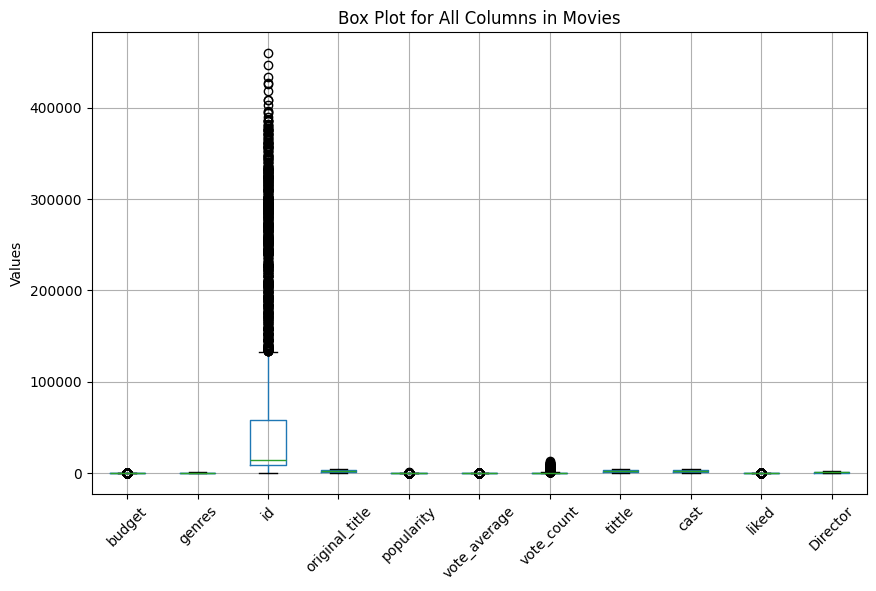

In [58]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a box plot for all columns
plt.figure(figsize=(10, 6))
movies.boxplot()
plt.title('Box Plot for All Columns in Movies')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


In [59]:
# x=movies.drop('genres',axis='columns')
# y=movies['genres']
x=movies.drop('liked',axis='columns')
y=movies['liked']

In [60]:
x['vote_average'] = x['vote_average'].astype(int)
x.dtypes
x.isnull().any()

budget            False
genres            False
id                False
original_title    False
popularity        False
vote_average      False
vote_count        False
tittle            False
cast              False
Director          False
dtype: bool

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

# Create a new DataFrame with scaled values and column names
x = pd.DataFrame(scaled_data, columns=x.columns)
x

,budget,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,Director
0,5.107181,-1.712060,-0.419128,-1.463003,4.053183,1.122229,8.999729,-1.458104,1.170248,-0.459022
1,6.654402,-0.794803,-0.641374,0.191475,3.696258,0.289143,3.086200,0.179399,-0.045445,-0.627444
2,5.303653,-1.818160,1.685526,0.568838,2.699638,0.289143,3.058657,0.564057,-1.002356,1.117761
3,5.426449,-1.469055,-0.091779,0.861780,2.854798,1.122229,6.817394,0.875103,-1.123706,-1.221278
4,5.672039,-1.670988,-0.086108,-0.366993,0.705198,0.289143,1.161467,-0.359700,1.429762,-1.608940
...,...,...,...,...,...,...,...,...,...,...
4798,-0.707916,-1.448520,-0.538967,-0.910308,-0.227028,0.289143,-0.366329,-0.905293,-1.236284,1.007415
4799,-0.713098,-0.127396,0.175909,0.045725,-0.655378,-0.543943,-0.555076,0.030732,-0.803517,-0.865559
4800,-0.713319,-0.281413,1.967083,0.491633,-0.630170,1.122229,-0.554266,0.485393,-0.731877,1.155510
4801,-0.713319,-1.931106,0.778263,0.457721,-0.648637,-0.543943,-0.553456,0.448588,-0.993584,-1.106577


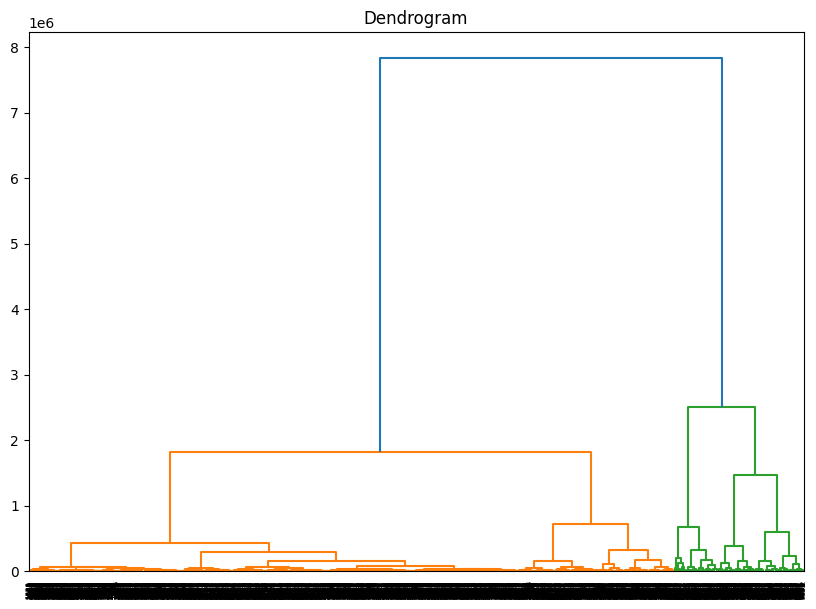

In [62]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(movies, method='ward'))

In [65]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(movies)


c:\Users\adwai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

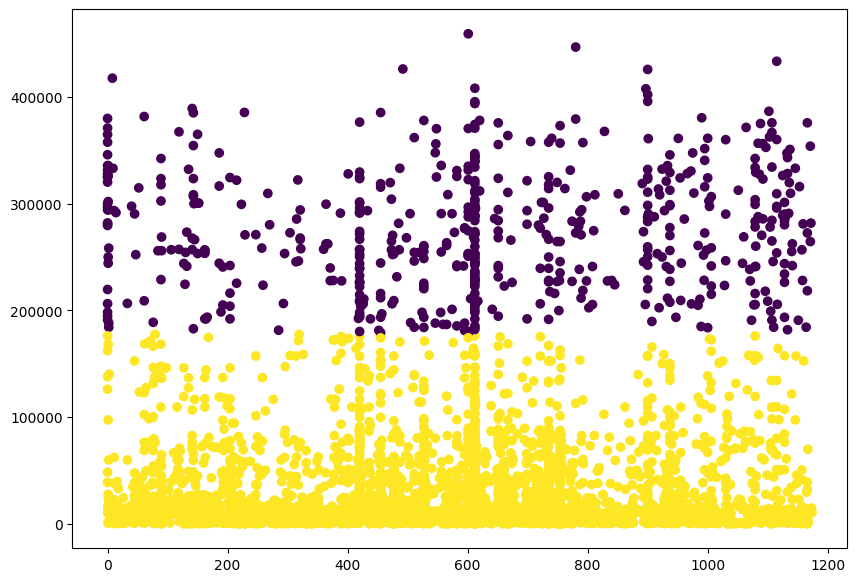

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(movies['genres'], movies['id'], c=cluster.labels_)


In [66]:
from sklearn.metrics import silhouette_score
silhouette_score(movies, cluster.fit_predict(movies))

c:\Users\adwai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.8153096551840463

Hyper parameter tuning

c:\Users\adwai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


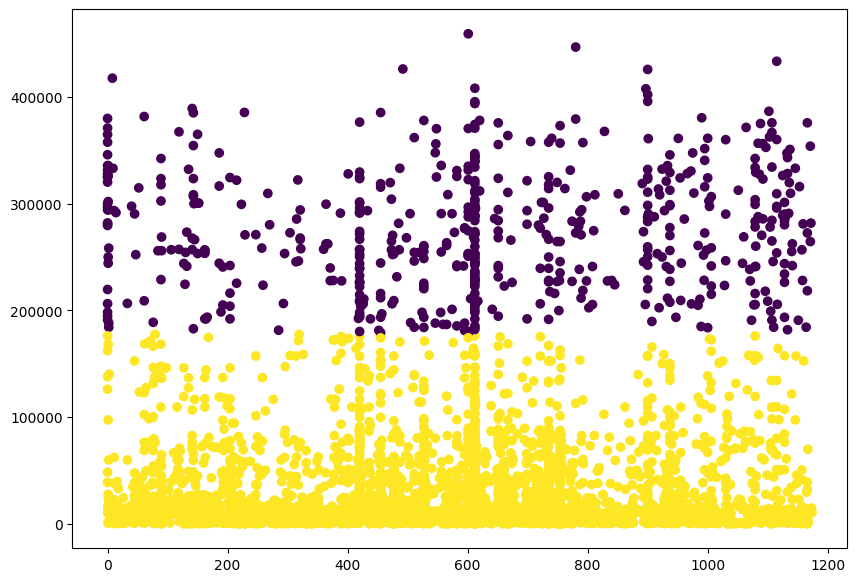

In [67]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
cluster.fit_predict(movies)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(movies['genres'], movies['id'], c=cluster.labels_);

In [68]:
from sklearn.metrics import silhouette_score
silhouette_score(movies, cluster.fit_predict(movies))

c:\Users\adwai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.8259670912854247

c:\Users\adwai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


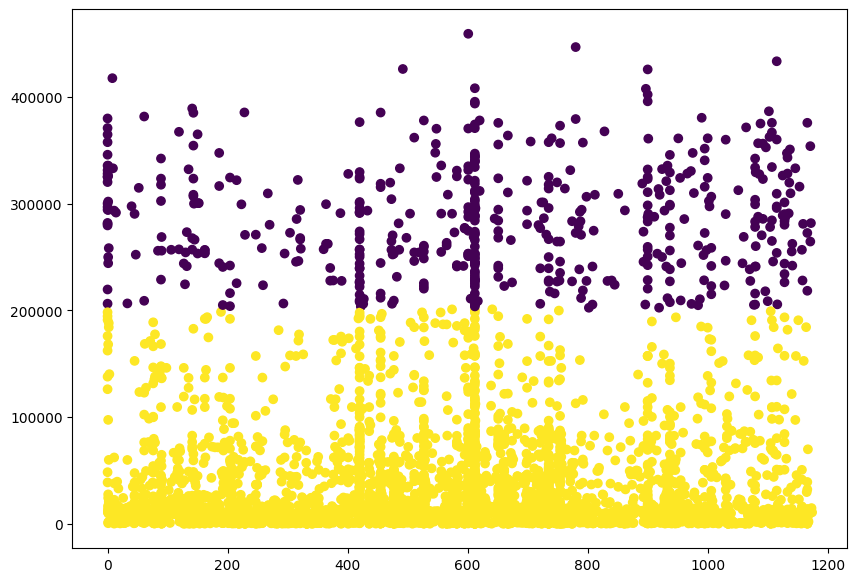

In [69]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
cluster.fit_predict(movies)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(movies['genres'], movies['id'], c=cluster.labels_);

In [70]:
from sklearn.metrics import silhouette_score
silhouette_score(movies, cluster.fit_predict(movies))

c:\Users\adwai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.8166782468693872

{'euclidean', 'l1', 'chebyshev', 'precomputed', 'l2', 'wminkowski', 'canberra', 'sokalmichener', 'manhattan', 'russellrao', 'haversine', 'sokalsneath', 'correlation', 'nan_euclidean', 'mahalanobis', 'jaccard', 'hamming', 'yule', 'cosine', 'dice', 'cityblock', 'sqeuclidean', 'rogerstanimoto', 'seuclidean', 'matching', 'minkowski', 'braycurtis'}

In [82]:
from sklearn.metrics import silhouette_score
silhouette_score(movies, cluster.fit_predict(movies))

c:\Users\adwai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.8259670912854247

In [84]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define the range of hyperparameters you want to search
n_clusters_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]
linkage_range = ['ward', 'complete', 'average', 'single']
affinity_range = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

# Assuming 'X' is your data
best_score = -1
best_params = {}

for n_clusters in n_clusters_range:
    for linkage in linkage_range:
        # 'ward' linkage only works with 'euclidean' affinity
        if linkage == 'ward':
            affinity_range = ['euclidean']
        else:
            affinity_range = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
        
        for affinity in affinity_range:
            # Create and fit the model
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, affinity=affinity)
            labels = model.fit_predict(movies)

            # Calculate the silhouette score
            score = silhouette_score(movies, labels)

            # Check if this is the best score so far
            if score > best_score:
                best_score = score
                best_params = {'n_clusters': n_clusters, 'linkage': linkage, 'affinity': affinity}

# Print the best parameters and their corresponding silhouette score
print("Best parameters:", best_params)
print("Best silhouette score:", best_score)


c:\Users\adwai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\adwai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\adwai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\adwai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\adwai\AppDa

Best parameters: {'n_clusters': 2, 'linkage': 'average', 'affinity': 'euclidean'}
Best silhouette score: 0.8259670912854247
